In [1]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np


In [2]:
# Carregando os dados para a variável "data"
data = pd.read_csv("../datasets/ex2data1.txt", header = None, names = ["Avaliacao 1", "Avaliacao 2", "Aprovado"])

# Inicializando Variáveis
m = len(data["Aprovado"])

x0 = np.ones(m)
avaliacao_1 = np.array((data["Avaliacao 1"]))
avaliacao_2 = np.array((data["Avaliacao 2"]))

X = np.array([x0, avaliacao_1, avaliacao_2]).T
y = np.array(data["Aprovado"]).reshape((m,1))
m, n = X.shape

print("Matriz X:\n",X[:5])
print("\n\nDados brutos: ")
data.head()

Matriz X:
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


Dados brutos: 


,Avaliacao 1,Avaliacao 2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def custo(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    custo = (1 / m) * np.sum(-y * np.log(h + 1e-15) - (1 - y) * np.log(1 - h + 1e-15))
    return custo

def gradiente(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    erro = h - y
    grad = (1 / m) * np.dot(X.T, erro)
    return grad

# Exemplo de uso com dimensão 3x100
X = np.random.rand(100, 3)  # matriz de características (3 x 100)
y = np.random.randint(0, 2, size=(100, 1))  # vetor de classes (1 x 100)
theta = np.zeros(3)  # parâmetros do modelo (incluindo o termo de viés)

resultado = minimize(custo, theta, args=(X, y.ravel()), method='CG', jac=gradiente)

x_otimo = resultado.x
custo_minimo = resultado.fun
sucesso = resultado.success

print("Parâmetros ótimos:", x_otimo)
print("Custo mínimo:", custo_minimo)
print("Sucesso:", sucesso)


Parâmetros ótimos: [ 0.41685329  0.10567306 -0.52628841]
Custo mínimo: 0.6891080982543317
Sucesso: True


In [4]:
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
y.ravel().ravel().ravel()

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

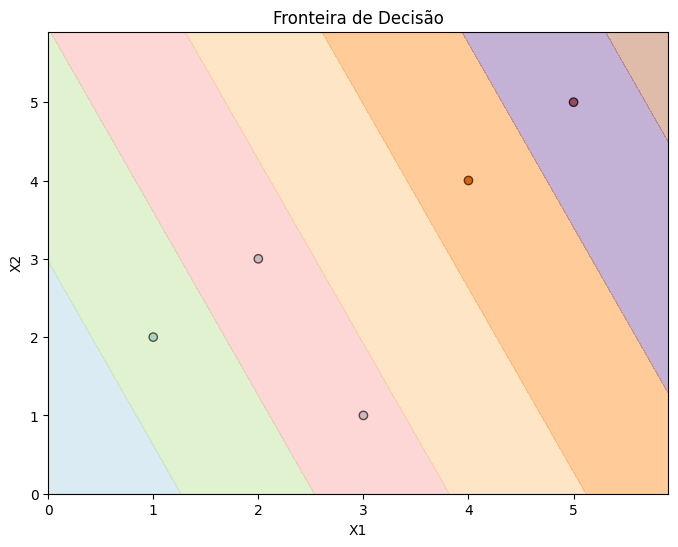

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Dados de exemplo
X = np.array([[1, 2], [2, 3], [3, 1], [4, 4], [5, 5]])
y = np.array([0, 0, 0, 1, 1])

# Função sigmóide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função de custo regularizada
def custo_regularizado(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    custo = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    regularizacao = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)  # Excluindo o termo de viés
    return custo + regularizacao

# Função do gradiente regularizado
def gradiente_regularizado(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    erro = h - y
    grad = (1 / m) * np.dot(X.T, erro)
    regularizacao = (lambda_ / m) * theta
    regularizacao[0] = 0  # Não regularizar o termo de viés
    return grad + regularizacao


# Função para plotar a fronteira de decisão
def plot_fronteira_decisao(X, y, theta):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

    Z = sigmoid(np.dot(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()], theta))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Paired)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


# Minimizar a função de custo regularizada para obter os parâmetros otimizados
theta_inicial = np.zeros(X.shape[1])
lambda_ = 1.0  # Parâmetro de regularização
resultado = minimize(custo_regularizado, theta_inicial, args=(X, y, lambda_), jac=gradiente_regularizado, method='CG')
theta_otimo = resultado.x


# Plotar a fronteira de decisão
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

novo_X = np.c_[ xx1.ravel(), xx2.ravel()]
z = np.dot(novo_X, theta_otimo)
Z = sigmoid(z)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.title('Fronteira de Decisão')
plt.xlabel('X1')
plt.ylabel('X2')


plt.show()

In [77]:
print(xx1.shape,xx2.shape,novo_X.shape,theta_otimo.shape,Z.shape)

novo_X

(60, 60) (60, 60) (3600, 2) (2,) (60, 60)


array([[0. , 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       ...,
       [5.7, 5.9],
       [5.8, 5.9],
       [5.9, 5.9]])

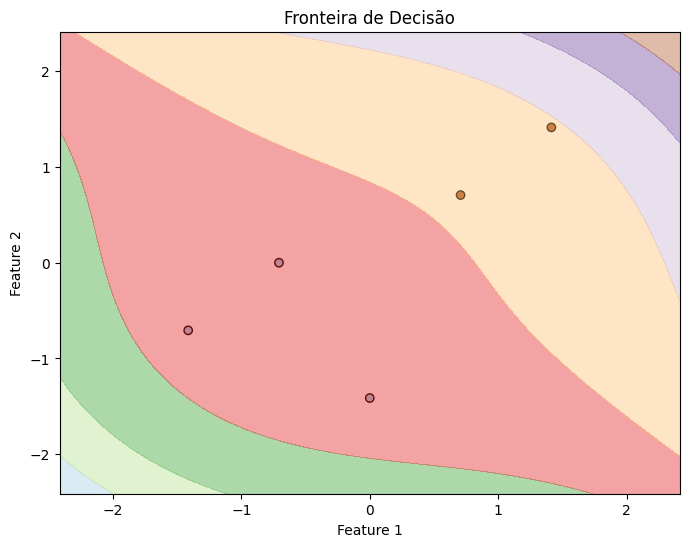

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Função sigmóide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função de custo regularizada
def custo_regularizado(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    custo = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    regularizacao = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)  # Excluindo o termo de viés
    return custo + regularizacao

# Função do gradiente regularizado
def gradiente_regularizado(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    erro = h - y
    grad = (1 / m) * np.dot(X.T, erro)
    regularizacao = (lambda_ / m) * theta
    regularizacao[0] = 0  # Não regularizar o termo de viés
    return grad + regularizacao

# Função de mapeamento polinomial
def mapeamento_polinomial(X, grau):
    m, n = X.shape
    novo_X = np.ones((m, 1))  # Inicializa o novo array com a coluna de termos constantes

    for i in range(1, grau + 1):
        for j in range(i + 1):
            novo_termo = (X[:, 0] ** (i - j)) * (X[:, 1] ** j)
            novo_X = np.column_stack((novo_X, novo_termo))

    return novo_X

# Dados de exemplo
X = np.array([[1, 2], [2, 3], [3, 1], [4, 4], [5, 5]])
y = np.array([0, 0, 0, 1, 1])

# Normalizar os dados
X_normalizado = (X - X.mean(axis=0)) / X.std(axis=0)

# Aplicar a função de mapeamento polinomial aos dados normalizados
grau = 3  # Grau do polinômio
X_mapeado = mapeamento_polinomial(X_normalizado, grau)

# Minimizar a função de custo regularizada para obter os parâmetros otimizados
theta_inicial = np.zeros(X_mapeado.shape[1])
lambda_ = 1.0  # Parâmetro de regularização
resultado = minimize(custo_regularizado, theta_inicial, args=(X_mapeado, y, lambda_), jac=gradiente_regularizado, method='CG')
theta_otimo = resultado.x

# Função para plotar a fronteira de decisão
def plot_fronteira_decisao(X, y, theta):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

    # Aplicar a função de mapeamento polinomial aos dados da grade de pontos
    novo_X = mapeamento_polinomial(np.c_[xx1.ravel(), xx2.ravel()], grau)
    
    # Calcular a previsão da fronteira de decisão
    Z = np.dot(novo_X, theta)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.Paired)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plotar a fronteira de decisão
plt.figure(figsize=(8, 6))
plot_fronteira_decisao(X_mapeado, y, theta_otimo)
plt.title('Fronteira de Decisão')
plt.show()
